In [2]:
# Mount Google Drive (if needed)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Necessary Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.datasets import make_blobs

# Load your datasets
file_path_1 = '/content/drive/My Drive/rfm_data.csv'
file_path_2 = '/content/drive/My Drive/df1.csv'

# Load the CSV file
df_1 = pd.read_csv(file_path_1)
df_2 = pd.read_csv(file_path_2)

In [4]:
# Extract the RFM features
X = df_1[['Recency', 'Frequency', 'Monetary']].values

# Standardize the data to mean=0 and variance=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# DBSCAN parameter tuning for silhouette score
best_score = -1
best_eps = None
best_min_samples = None

In [6]:
# Iterate over a range of eps and min_samples values to find the optimal DBSCAN parameters
for eps in np.arange(0.2, 1.0, 0.1):  # Try different eps values
    for min_samples in range(5, 20, 5):  # Try different min_samples values
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_scaled)
        labels = db.labels_

        # If all points are assigned to one cluster, skip this iteration
        if len(set(labels)) == 1:
            continue

        score = metrics.silhouette_score(X_scaled, labels)

        if score > best_score:
            best_score = score
            best_eps = eps
            best_min_samples = min_samples

In [7]:

# Output the best silhouette score and corresponding parameters
print(f'silhouette score: {best_score}')
print(f'eps: {best_eps}')
print(f'min_samples: {best_min_samples}')





silhouette score: 0.8380746746628123
eps: 0.9000000000000001
min_samples: 10


<ipython-input-8-2feeadfd137f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer_segment', y='RFM_Score', data=df_1, palette='viridis')


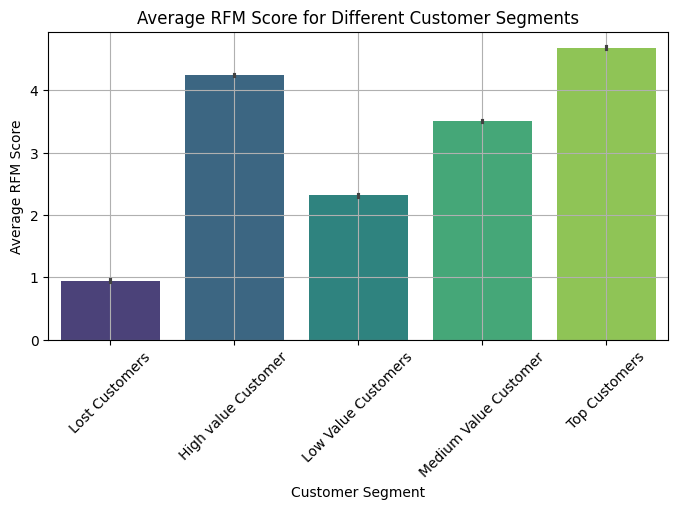

In [8]:
# Create a bar plot to visualize the average RFM_Score for each customer segment
plt.figure(figsize=(8, 4))
sns.barplot(x='Customer_segment', y='RFM_Score', data=df_1, palette='viridis')

# Add labels and title
plt.title('Average RFM Score for Different Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Average RFM Score')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

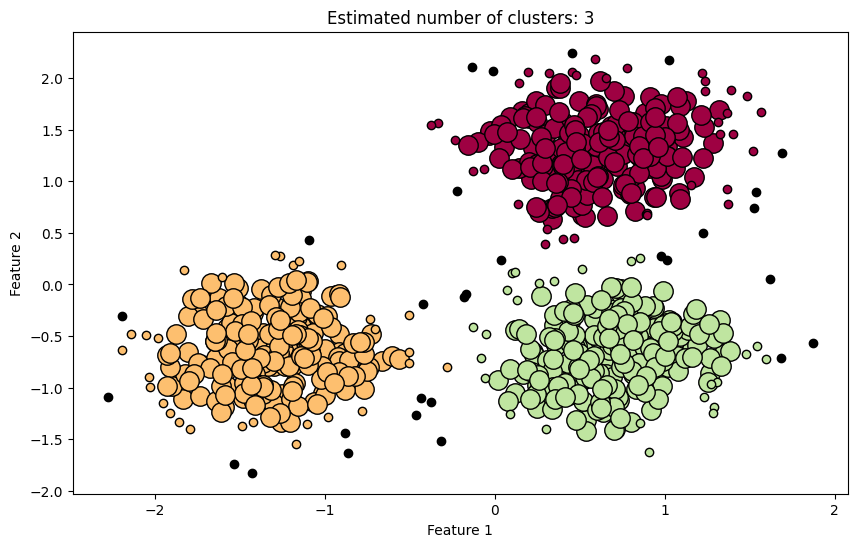

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate sample data (you can replace this with your dataset)
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)

# Normalize the data for better results with DBSCAN
X = StandardScaler().fit_transform(X)

# Fit DBSCAN model
db = DBSCAN(eps=0.3, min_samples=15).fit(X)
labels = db.labels_

# Identify core samples
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plotting the clusters
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(10, 6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Plot core samples
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    # Plot non-core samples
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

# Add title and axis labels
plt.title(f'Estimated number of clusters: {n_clusters_}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.savefig('/content/drive/My Drive/images/DBSCAN_PLOT.png')

# Display the plot
plt.show()
